<a href="https://colab.research.google.com/github/LucioJuniorMachado/Trabalho_Redes_Neurais/blob/main/multimodais_inagural_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Tarefas e modelos multimodais
Nesta seção, daremos uma olhada rápida nas diferentes tarefas multimodais envolvendo modalidades de imagem e texto e seus modelos correspondentes.

Antes de mergulhar, vamos fazer uma pequena recapitulação sobre o que significa "multimodal", que foi abordado em seções anteriores.

O mundo humano é uma sinfonia de diversas entradas sensoriais. Percebemos e entendemos por meio da visão, som, toque e muito mais.

Essa multimodalidade é o que separa nossa rica compreensão das limitações dos modelos tradicionais de IA unimodais.

Inspirando-se na cognição humana, os modelos multimodais visam preencher essa lacuna integrando informações de várias fontes, como texto, imagens, áudio e até mesmo dados de sensores.

Essa fusão de modalidades leva a uma compreensão mais abrangente e diferenciada do mundo, desbloqueando uma vasta gama de tarefas e aplicações.

#Exemplos de tarefas
Antes de analisar modelos específicos, é crucial entender a gama diversificada de tarefas envolvendo imagem e texto. Essas tarefas incluem, mas não estão limitadas a:

##Visual Question Answering (VQA) e Visual Reasoning:
imagine uma máquina que olha para uma imagem e entende suas perguntas sobre ela. Visual Question Answering (VQA) é exatamente isso! Ele treina computadores para extrair significado de imagens e responder perguntas como "Quem está dirigindo o carro?" enquanto o Visual Reasoning é o molho secreto, permitindo que a máquina vá além do simples reconhecimento e infira relacionamentos, compare objetos e entenda o contexto da cena para dar respostas precisas. É como pedir a um detetive para ler as pistas em uma imagem, só que muito mais rápido e melhor!

##Document Visual Question Answering (DocVQA):
imagine um computador entendendo o texto e o layout de um documento, como um mapa ou contrato, e então respondendo perguntas sobre ele diretamente da imagem. Isso é Document Visual Question Answering (DocVQA) em poucas palavras. Ela combina visão computacional para processar elementos de imagem e processamento de linguagem natural para interpretar texto, permitindo que máquinas "leiam" e respondam perguntas sobre documentos assim como humanos. Pense nisso como um supercarregamento da pesquisa de documentos com IA para desbloquear todas as informações presas nessas imagens.

##Legenda de imagem:
A legenda de imagem preenche a lacuna entre visão e linguagem. Ela analisa uma imagem como um detetive, extraindo detalhes, entendendo a cena e, em seguida, elaborando uma ou duas frases que contam a história - um pôr do sol sobre um mar calmo, uma criança rindo em um balanço ou até mesmo uma rua movimentada da cidade. É uma mistura fascinante de visão computacional e linguagem, permitindo que os computadores descrevam o mundo ao seu redor, uma imagem de cada vez.

##Recuperação de imagem e texto:
A recuperação de imagem e texto é como um casamenteiro para imagens e suas descrições. Pense nisso como procurar um livro específico em uma biblioteca, mas em vez de navegar pelos títulos, você pode usar a imagem na capa ou um breve resumo para encontrá-lo. É como um mecanismo de busca superpoderoso que entende imagens e palavras, abrindo portas para aplicativos interessantes como busca de imagens, legendas automáticas e até mesmo ajudando pessoas com deficiência visual a "ver" através de descrições de texto.

##Ancoragem visual:
O aterramento visual é como conectar os pontos entre o que vemos e dizemos. Trata-se de entender como a linguagem faz referência a partes específicas de uma imagem, permitindo que modelos de IA identifiquem objetos ou regiões com base em descrições de linguagem natural. Imagine perguntar "Onde está a maçã vermelha na fruteira?" e a IA a destaca instantaneamente na imagem - isso é aterramento visual em ação!

##Geração de texto para imagem:
Imagine um pincel mágico que interpreta suas palavras e as dá vida! A geração de texto para imagem é assim; transforma suas descrições escritas em imagens únicas. É uma mistura de compreensão da linguagem e criação de imagens, onde seu texto desbloqueia um mundo visual de paisagens fotorrealistas a abstrações oníricas, tudo nascido do poder de suas palavras.

###Resposta Visual a Perguntas (VQA) e Raciocínio Visual

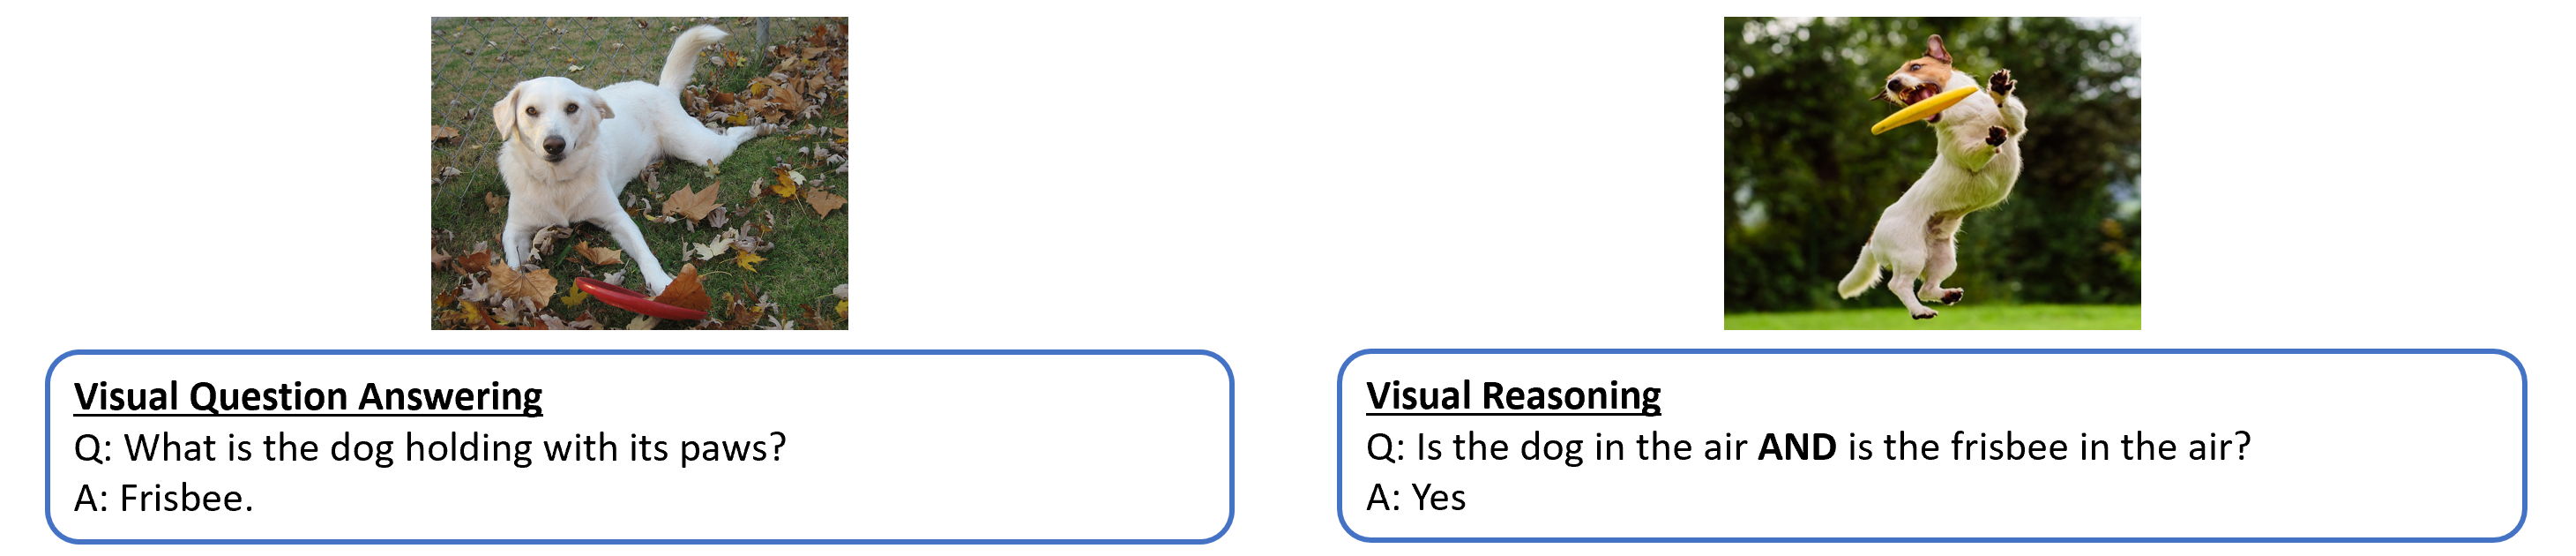

####Resposta Visual a Perguntas (VQA)

#Entrada:
Um par de imagem-pergunta (imagem e uma pergunta sobre ela).


#Saída:
Em configuração de múltipla escolha: Um rótulo correspondente à resposta correta entre opções predefinidas. Em configuração aberta: Uma resposta em linguagem natural de forma livre com base na imagem e na pergunta.
#Tarefa:
Responder a perguntas sobre imagens. (A maioria dos modelos VQA trata como um problema de classificação com respostas predefinidas). Veja o exemplo acima para referência.


###Raciocínio Visual

#Entrada:
Varia dependendo da tarefa específica de raciocínio visual:
#Tarefas no estilo VQA:
Pares de imagem-pergunta.
#Tarefas de correspondência:
 Imagens e declarações de texto.
#Tarefas de vinculação:
Par de imagem e texto (potencialmente com várias declarações).
#Tarefas de subperguntas:
Imagem e uma pergunta primária com subperguntas adicionais relacionadas à percepção.
#Saída:


##BLIP-VQA:
É um grande modelo pré-treinado para tarefas de resposta visual a perguntas (VQA) desenvolvido pela Salesforce AI. Ele usa uma abordagem de “Bootstrapping Language-Image Pre-training” (BLIP), que aproveita dados da web ruidosos e geração de legendas para atingir desempenho de última geração em várias tarefas de visão e linguagem. Você pode usar o BLIP no huggingface da seguinte forma:

In [ ]:
from PIL import Image
from transformers import pipeline

vqa_pipeline = pipeline(
    "visual-question-answering", model="Salesforce/blip-vqa-capfilt-large"
)

image = Image.open("elefante.jpg")
question = "what is tehe animal?"

vqa_pipeline(image, question, top_k=1)

####VLIT:
É um modelo Vision-and-Language Transformer (ViLT), utilizando uma arquitetura de transformador sem convoluções ou supervisão de região, ajustado no conjunto de dados VQAv2 para responder a perguntas de linguagem natural sobre imagens. O modelo ViLT base ostenta uma arquitetura grande (tamanho B32) e alavanca o treinamento conjunto de imagem e texto, tornando-o eficaz para várias tarefas de visão e linguagem, particularmente VQA, alcançando desempenho competitivo. Você pode usar VLIT no HuggingFace da seguinte forma:

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

# prepare image + question
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "How many cats are there?"

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

Entrada:

Imagem do documento: Uma imagem digitalizada ou escaneada de um documento, contendo texto, layout e elementos visuais.
Pergunta sobre o documento: Uma pergunta em linguagem natural colocada em formato de texto.
Tarefa:

Analisar e entender: O modelo DocVQA deve processar as informações visuais e textuais dentro do documento para compreender completamente seu conteúdo.
Raciocinar e inferir: O modelo precisa estabelecer relações entre elementos visuais, texto e a pergunta para tirar conclusões relevantes.
Gerar uma resposta em linguagem natural: O modelo deve produzir uma resposta clara, concisa e precisa para a pergunta em formato de texto em linguagem natural. Veja o exemplo acima para referência.
Saída: Resposta à pergunta: Uma resposta em texto que aborda diretamente a consulta e reflete com precisão as informações encontradas no documento.

Agora, vamos dar uma olhada em alguns dos modelos DocVQA populares no HuggingFace:

LayoutLM: É uma rede neural pré-treinada que entende imagens de documentos analisando em conjunto o texto e seu layout. Diferentemente dos modelos NLP tradicionais, ele considera fatores como tamanho da fonte, posição e proximidade para aprender relacionamentos entre palavras e seus significados no contexto do documento. Isso permite que ele se destaque em tarefas como compreensão de formulários, análise de recibos e classificação de documentos, tornando-o uma ferramenta poderosa para extrair informações de documentos digitalizados. Você pode usar o LayoutLM no HuggingFace da seguinte forma:

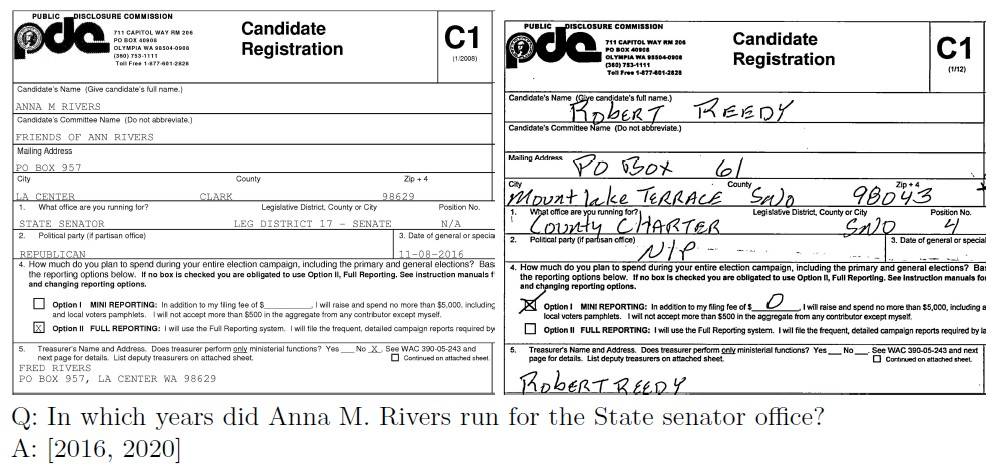

####Donut:
Também conhecido como OCR-free Document Understanding Transformer, é um modelo de processamento de imagem de última geração que ignora o reconhecimento óptico de caracteres (OCR) tradicional e analisa diretamente as imagens de documentos para entender seu conteúdo. Ele combina um codificador de visão (Swin Transformer) com um decodificador de texto (BART) para extrair informações e gerar descrições textuais, destacando-se em tarefas como classificação de documentos, compreensão de formulários e resposta visual a perguntas. Sua força única está em sua natureza "de ponta a ponta", evitando erros potenciais introduzidos por etapas separadas de OCR e alcançando precisão impressionante com processamento eficiente. Você pode usar o modelo Donut no HuggingFace da seguinte maneira:

In [ ]:
from transformers import pipeline
from PIL import Image

pipe = pipeline(
    "document-question-answering", model="naver-clova-ix/donut-base-finetuned-docvqa"
)

question = "What is the purchase amount?"
image = Image.open("doc.jpg")

pipe(image=image, question=question)



####Nougat:
É um modelo de transformador visual, treinado em milhões de artigos acadêmicos, que pode "ler" diretamente PDFs digitalizados e gerar seu conteúdo em uma linguagem de marcação estruturada, até mesmo entendendo elementos complexos como equações matemáticas e tabelas. Ele ignora o reconhecimento óptico de caracteres tradicional, alcançando alta precisão enquanto preserva a semântica, tornando o conhecimento científico armazenado em PDFs mais acessível e utilizável. O Nougat usa a mesma arquitetura do Donut, ou seja, um codificador de transformador de imagem e um decodificador de transformador de texto autorregressivo para traduzir PDFs científicos para markdown, permitindo acesso mais fácil a eles. Você pode usar o modelo Nougat no HuggingFace da seguinte forma:

In [ ]:
!pip install datasets

#Legenda de imagem

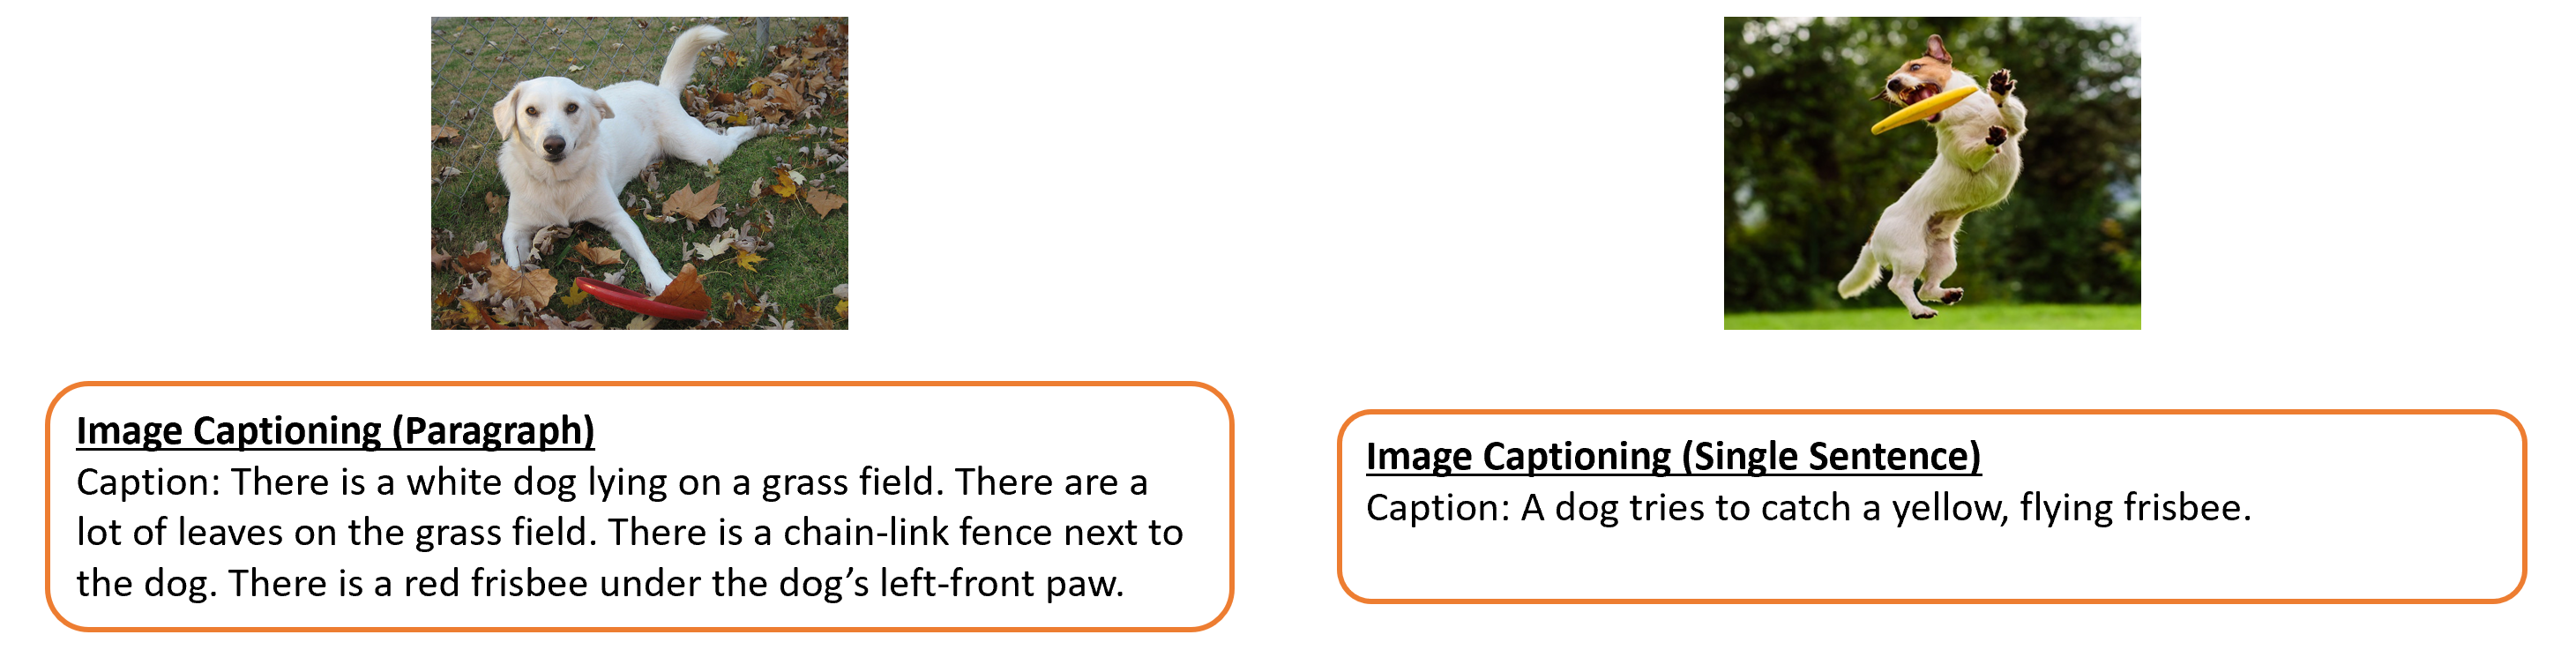

###Entradas:
Imagem: Imagem em vários formatos (por exemplo, JPEG, PNG).
Extrator de recursos de imagem pré-treinado (opcional): Uma rede neural pré-treinada que pode extrair recursos significativos de imagens, como uma rede neural convolucional (CNN)
###Saídas:
Legendas textuais: Frase única ou parágrafo que descreve com precisão o conteúdo das imagens de entrada, capturando objetos, ações, relacionamentos e contexto geral. Veja o exemplo acima para referência.
###Tarefa:
Gerar automaticamente descrições de imagens em linguagem natural. Isso envolve: (1) Entender o conteúdo visual da imagem (objetos, ações, relacionamentos). (2) Codificar essas informações em uma representação significativa. (3) Decodificar essa representação em uma frase ou frase coerente, gramaticalmente correta e informativa.
Agora, vamos dar uma olhada em alguns dos modelos populares de Legendas de Imagens no HuggingFace:

####ViT-GPT2:
É um modelo PyTorch para gerar legendas de imagens, construído pela combinação do Vision Transformer (ViT) para extração de recursos visuais e GPT-2 para geração de texto. Treinado no conjunto de dados COCO, ele aproveita a capacidade do ViT de codificar detalhes ricos de imagens e a fluência do GPT-2 na produção de linguagem para criar legendas precisas e descritivas. Este modelo de código aberto oferece uma solução eficaz para tarefas de compreensão e legendagem de imagens. Você pode usar o ViT-GPT2 no HuggingFace da seguinte forma:

In [ ]:
from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("https://ankur3107.github.io/assets/images/image-captioning-example.png")

###BLIP-Image-Captioning:
É um modelo de legendagem de imagem de última geração baseado no BLIP, uma estrutura pré-treinada em dados da web limpos e ruidosos para compreensão e geração unificadas de visão e linguagem. Ele utiliza um processo de bootstrapping para filtrar legendas ruidosas, obtendo melhor desempenho em tarefas como legendagem de imagem, recuperação de imagem-texto e VQA. Esta versão grande, construída com um backbone ViT-L, se destaca na geração de legendas precisas e detalhadas a partir de imagens. Você pode usar o modelo BLIP Image Captioning no HuggingFace da seguinte forma:

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-large"
)

img_url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

####git-base:
microsoft/git-base é uma versão de tamanho base do modelo GIT (GenerativeImage2Text), um decodificador Transformer treinado para gerar descrições de texto de imagens.
Ele pega tokens de imagem e tokens de texto como entrada, prevendo o próximo token de texto com base na imagem e no texto anterior.
Isso o torna adequado para tarefas como legendagem de imagens e vídeos.
Versões ajustadas como microsoft/git-base-coco e microsoft/git-base-textcaps existem para conjuntos de dados específicos, enquanto o modelo base oferece um ponto de partida para personalização adicional. Você pode usar o modelo git-base no HuggingFace da seguinte forma:

In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

##Recuperação de imagem e texto

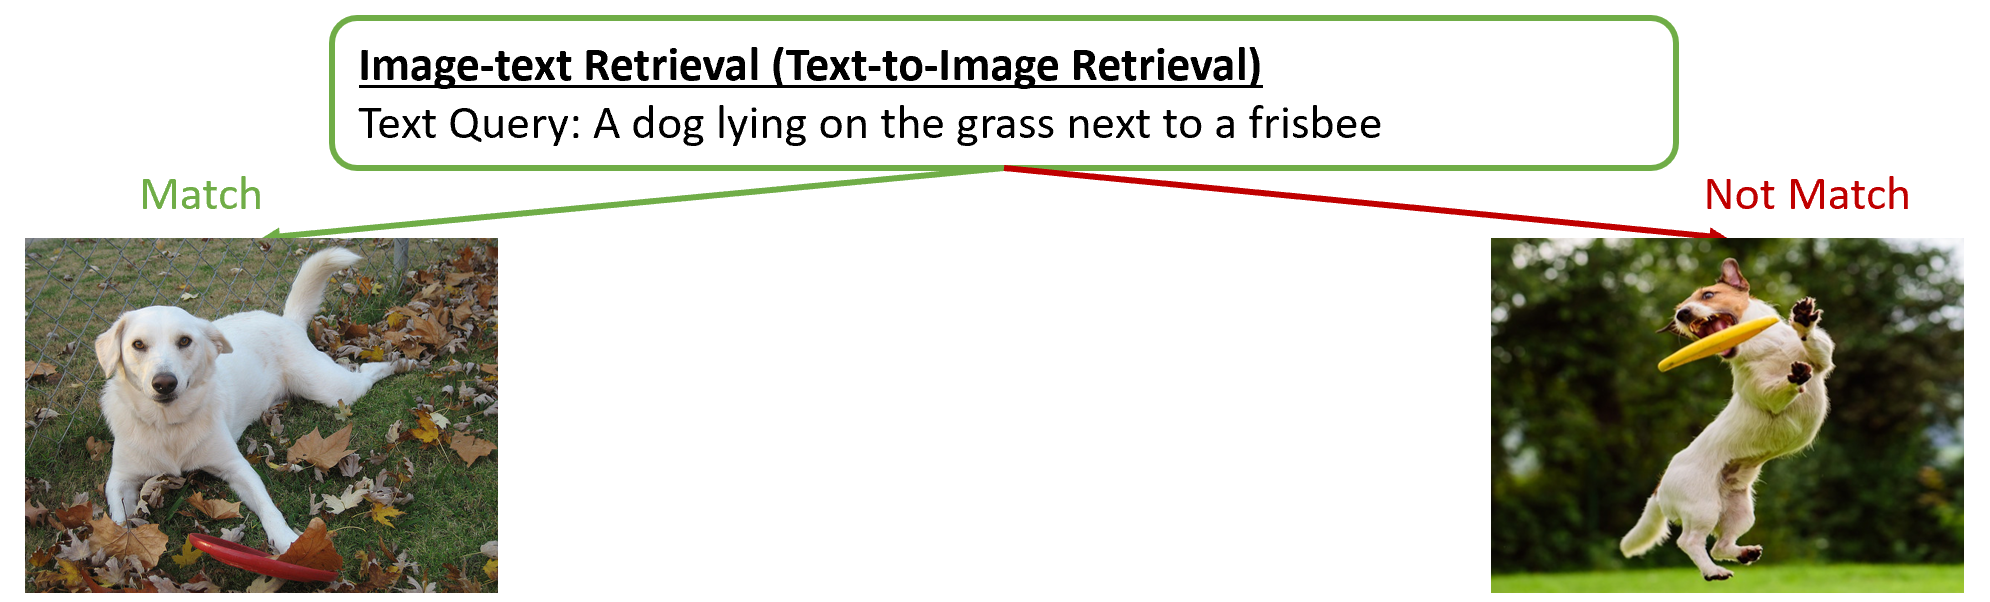

###Entradas:
Imagens: Imagem em vários formatos (por exemplo, JPEG, PNG).
Texto: Texto em linguagem natural, geralmente na forma de legendas, descrições ou palavras-chave associadas a imagens.
###Saídas:
Imagens relevantes: Quando uma consulta de texto é fornecida, o sistema retorna uma lista classificada de imagens mais relevantes para o texto.
Texto relevante: Quando uma consulta de imagem é fornecida, o sistema retorna uma lista classificada de descrições de texto ou legendas que melhor descrevem a imagem.
###Tarefas:
Recuperação de imagem para texto: Dada uma imagem como entrada, recupere descrições de texto ou legendas que descrevam com precisão seu conteúdo.
Recuperação de texto para imagem: Dada uma consulta de texto, recupere imagens que correspondam visualmente aos conceitos e entidades mencionados no texto.
Um dos modelos mais populares para a Recuperação de Imagem-Texto é o CLIP.

####CLIP (Contrastive Language-Image Pretraining):
Ele se destaca na recuperação de imagem-texto ao alavancar um espaço de incorporação compartilhado. Por meio do aprendizado contrastivo, ele pré-treina em conjuntos de dados de texto e imagem em larga escala, permitindo que o modelo mapeie diversos conceitos em um espaço comum. O CLIP aproveita uma abordagem de aprendizado contrastivo durante o pré-treinamento, onde aprende a mapear imagens e texto em um espaço de incorporação compartilhado. Esse espaço compartilhado permite a comparação direta entre as duas modalidades, permitindo tarefas de recuperação eficientes e precisas. Na recuperação de imagem-texto, o CLIP pode ser aplicado codificando imagens e texto no espaço de incorporação compartilhado, e a similaridade entre uma imagem e uma consulta textual é medida pela proximidade de suas respectivas incorporações. A versatilidade do modelo surge de sua capacidade de compreender relacionamentos semânticos sem ajustes finos específicos da tarefa, tornando-o eficiente para aplicativos que variam de recuperação de imagem baseada em conteúdo a interpretação de consultas de linguagem natural para imagens. Você pode usar o CLIP no HuggingFace para recuperação de imagem-texto da seguinte forma:

In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(
    text=["a photo of a cat", "a photo of a dog"],
    images=image,
    return_tensors="pt",
    padding=True,
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(
    dim=1
)  # we can take the softmax to get the label probabilities

##Aterramento visual

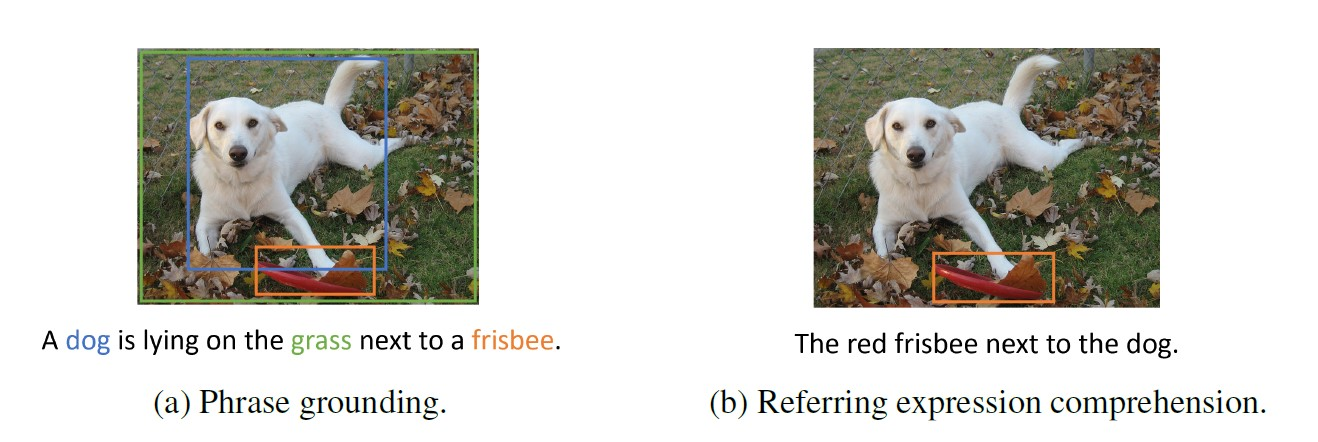

###Entradas:

Imagem: Uma representação visual de uma cena ou objeto.
Consulta em linguagem natural: Uma descrição de texto ou pergunta que se refere a uma parte específica da imagem.

###Saída:
Caixa delimitadora ou máscara de segmentação: Uma região espacial dentro da imagem que corresponde ao objeto ou área descrita na consulta. Isso é normalmente representado como coordenadas ou uma região destacada.

###Tarefa:
Localizar o objeto ou região relevante: O modelo deve identificar corretamente a parte da imagem que corresponde à consulta. Isso envolve entender tanto o conteúdo visual da imagem quanto o significado linguístico da consulta.

Agora, veja alguns dos modelos populares de Visual Grounding (Detecção de Objetos) no HuggingFace.

####OWL-ViT:
OWL-ViT (Vision Transformer for Open-World Localization) é um poderoso modelo de detecção de objetos construído em uma arquitetura padrão do Vision Transformer e treinado em pares de imagem e texto em larga escala. Ele se destaca na detecção de "vocabulário aberto", o que significa que pode identificar objetos não presentes em seus dados de treinamento com base em descrições textuais. Ao alavancar o pré-treinamento contrastivo e o ajuste fino, o OWL-ViT atinge um desempenho impressionante em tarefas de detecção de disparo zero (guiada por texto) e de disparo único (guiada por imagem), tornando-o uma ferramenta versátil para pesquisa e identificação flexíveis em imagens. Você pode usar o OWL-ViT no HuggingFace da seguinte forma:

In [ ]:
import requests
from PIL import Image
import torch

from transformers import OwlViTProcessor, OwlViTForObjectDetection

processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to COCO API
results = processor.post_process_object_detection(
    outputs=outputs, threshold=0.1, target_sizes=target_sizes
)

i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Print detected objects and rescaled box coordinates
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}"
    )

# Zoom da imagem em data augmentation

In [ ]:
# example of zoom image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import requests
from PIL import Image
import torch

from transformers import OwlViTProcessor, OwlViTForObjectDetection
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)


# convert to numpy array
data = img_to_array(image)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.5])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = next(it)
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Iluminando a imagem em data augmentation

In [ ]:
# example of brighting image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from transformers import OwlViTProcessor, OwlViTForObjectDetection
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)
# convert to numpy array
data = img_to_array(image)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.5,1.5])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = next(it)
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Inversão horizontal da imagem em data augmentation

In [ ]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)
# convert to numpy array
data = img_to_array(image)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = next(it)
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Implementação de 20 épocas de treinamento





In [ ]:
import numpy as np


# Load the processor and model
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

# Load the image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Define the text queries
texts = [["a photo of a cat", "a photo of a dog"]]

# Convert the PIL image to a NumPy array for ImageDataGenerator
data = img_to_array(image)

# Expand dimension to one sample (ImageDataGenerator expects batches)
samples = expand_dims(data, 0)

# Create image data augmentation generator (choose one augmentation type)
datagen = ImageDataGenerator(brightness_range=[0.5,1.5]) # Using brightness as an example

# Number of conceptual "epochs"
num_epochs = 20

print(f"Starting {num_epochs} conceptual epochs of inference and augmentation...")

for epoch in range(num_epochs):
    print(f"\n--- Conceptual Epoch {epoch + 1}/{num_epochs} ---")

    # Prepare iterator for the current "epoch"
    # Note: This re-initializes the generator for each epoch, which might not
    # be typical training behavior where the generator might continuously flow.
    # For demonstration, we generate a single batch per "epoch".
    it = datagen.flow(samples, batch_size=1)

    # Get one augmented image batch from the generator for this "epoch"
    batch_np = next(it)
    augmented_image_np = batch_np[0]

    # Convert the augmented NumPy array back to PIL Image for the processor
    augmented_image_pil = Image.fromarray(augmented_image_np.astype('uint8'))

    # Prepare inputs for the OwlViT model
    inputs = processor(text=texts, images=augmented_image_pil, return_tensors="pt")

    # Get the model outputs
    with torch.no_grad(): # Inference mode
        outputs = model(**inputs)

    # Process and print results for this "epoch"'s augmented image
    target_sizes = torch.Tensor([augmented_image_pil.size[::-1]])
    results = processor.post_process_object_detection(
        outputs=outputs, threshold=0.1, target_sizes=target_sizes
    )

    # Retrieve predictions for the first image (and corresponding text queries)
    i = 0
    text = texts[i]
    boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    print(f"Inference results for Epoch {epoch + 1}:")
    if len(boxes) > 0:
        for box, score, label in zip(boxes, scores, labels):
            box = [round(i, 2) for i in box.tolist()]
            print(
                f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}"
            )
    else:
        print("No objects detected above the threshold.")

    # Optionally, plot the augmented image for this epoch
    # pyplot.figure()
    # pyplot.imshow(augmented_image_np.astype('uint8'))
    # pyplot.title(f"Epoch {epoch + 1} Augmented Image")
    # pyplot.axis('off')
    # pyplot.show() # This will show each image individually, might be too many plots

print("\nConceptual epochs finished.")

# Comparação dos resultados de treinamento com a rede original


In [ ]:
import numpy as np
# To compare the results, we need to store the results from the original
# inference (without augmentation) and the results from the "training" epochs.

# --- Original Inference (without augmentation) ---

print("--- Original Inference Results (without augmentation) ---")

processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]

inputs_original = processor(text=texts, images=image, return_tensors="pt")
outputs_original = model(**inputs_original)

target_sizes_original = torch.Tensor([image.size[::-1]])
results_original = processor.post_process_object_detection(
    outputs=outputs_original, threshold=0.1, target_sizes=target_sizes_original
)

# Store original results
original_detections = []
i = 0
text_original = texts[i]
boxes_original, scores_original, labels_original = results_original[i]["boxes"], results_original[i]["scores"], results_original[i]["labels"]

print("Detected objects in the original image:")
if len(boxes_original) > 0:
    for box, score, label in zip(boxes_original, scores_original, labels_original):
        box_list = [round(i, 2) for i in box.tolist()]
        print(
            f"Detected {text_original[label]} with confidence {round(score.item(), 3)} at location {box_list}"
        )
        original_detections.append({
            'label': text_original[label],
            'confidence': round(score.item(), 3),
            'box': box_list
        })
else:
    print("No objects detected above the threshold in the original image.")

# --- Store Results from Conceptual Training Epochs ---

# In the previous code, we already ran the 20 "epochs" and printed results.
# To compare, we would need to store the results from each epoch as well.
# Let's modify the loop to store the results instead of just printing.

epoch_detections = {}

# Load the processor and model again (or use the ones loaded before the loop)
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

# Load the original image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Define the text queries
texts = [["a photo of a cat", "a photo of a dog"]]

# Convert the PIL image to a NumPy array for ImageDataGenerator
data = img_to_array(image)

# Expand dimension to one sample (ImageDataGenerator expects batches)
samples = expand_dims(data, 0)

# Create image data augmentation generator (using the same one as before)
datagen = ImageDataGenerator(brightness_range=[0.5,1.5]) # Using brightness as an example

# Number of conceptual "epochs"
num_epochs = 20

print(f"\n--- Running and Storing Results for {num_epochs} Conceptual Epochs ---")

for epoch in range(num_epochs):
    # print(f"\nProcessing Conceptual Epoch {epoch + 1}/{num_epochs}") # Optional: print progress

    it = datagen.flow(samples, batch_size=1)
    batch_np = next(it)
    augmented_image_np = batch_np[0]
    augmented_image_pil = Image.fromarray(augmented_image_np.astype('uint8'))

    inputs = processor(text=texts, images=augmented_image_pil, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.Tensor([augmented_image_pil.size[::-1]])
    results = processor.post_process_object_detection(
        outputs=outputs, threshold=0.1, target_sizes=target_sizes
    )

    current_epoch_detections = []
    i = 0
    text_epoch = texts[i]
    boxes_epoch, scores_epoch, labels_epoch = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    if len(boxes_epoch) > 0:
        for box, score, label in zip(boxes_epoch, scores_epoch, labels_epoch):
             box_list = [round(i, 2) for i in box.tolist()]
             current_epoch_detections.append({
                'label': text_epoch[label],
                'confidence': round(score.item(), 3),
                'box': box_list
             })
    # else:
        # print(f"No objects detected above the threshold in Epoch {epoch + 1}.") # Optional: print if no detection

    epoch_detections[f'epoch_{epoch+1}'] = current_epoch_detections

print("\n--- Comparison of Results ---")

print("\nOriginal Detections:")
if original_detections:
    for det in original_detections:
        print(f"- {det['label']} (Confidence: {det['confidence']}) at {det['box']}")
else:
    print("No detections in the original image.")

print("\nComparison across Epochs:")

# Simple comparison: count how many epochs detected each object and their average confidence
detected_objects_summary = {}

for epoch, detections in epoch_detections.items():
    for det in detections:
        obj_key = det['label']
        if obj_key not in detected_objects_summary:
            detected_objects_summary[obj_key] = {
                'count': 0,
                'total_confidence': 0,
                'confidences': []
            }
        detected_objects_summary[obj_key]['count'] += 1
        detected_objects_summary[obj_key]['total_confidence'] += det['confidence']
        detected_objects_summary[obj_key]['confidences'].append(det['confidence'])

if detected_objects_summary:
    for obj, data in detected_objects_summary.items():
        avg_confidence = data['total_confidence'] / data['count'] if data['count'] > 0 else 0
        print(f"- Object '{obj}': Detected in {data['count']}/{num_epochs} epochs. Average Confidence: {avg_confidence:.3f}")

        # You could also look at the range of confidences
        # print(f"  Confidence Range: [{min(data['confidences']):.3f} - {max(data['confidences']):.3f}]")
else:
    print("No objects were detected in any of the augmented images across epochs (above threshold 0.1).")

# Further comparison could involve:
# 1. Checking if the *same* object (e.g., the cat) was detected consistently.
# 2. Comparing the bounding box locations across epochs (are they stable?).
# 3. Comparing the confidence scores for a specific object across epochs to see
#    how augmentation affected the model's certainty.

# Example: Comparing confidence for 'a photo of a cat' across epochs
cat_confidences_original = [det['confidence'] for det in original_detections if det['label'] == 'a photo of a cat']
cat_confidences_epochs = [det['confidence'] for epoch, detections in epoch_detections.items() for det in detections if det['label'] == 'a photo of a cat']

print("\nConfidence Comparison for 'a photo of a cat':")
if cat_confidences_original:
    print(f"  Original Confidence: {cat_confidences_original[0]:.3f}" if len(cat_confidences_original) == 1 else f"  Original Confidences: {cat_confidences_original}")
else:
    print("  'a photo of a cat' not detected in original.")

if cat_confidences_epochs:
    print(f"  Epoch Confidences (total {len(cat_confidences_epochs)} detections): Min={min(cat_confidences_epochs):.3f}, Max={max(cat_confidences_epochs):.3f}, Avg={sum(cat_confidences_epochs)/len(cat_confidences_epochs):.3f}")
else:
    print("  'a photo of a cat' not detected in any augmented epoch.")

# Example: Comparing confidence for 'a photo of a dog' across epochs
dog_confidences_original = [det['confidence'] for det in original_detections if det['label'] == 'a photo of a dog']
dog_confidences_epochs = [det['confidence'] for epoch, detections in epoch_detections.items() for det in detections if det['label'] == 'a photo of a dog']

print("\nConfidence Comparison for 'a photo of a dog':")
if dog_confidences_original:
    print(f"  Original Confidence: {dog_confidences_original[0]:.3f}" if len(dog_confidences_original) == 1 else f"  Original Confidences: {dog_confidences_original}")
else:
    print("  'a photo of a dog' not detected in original.")

if dog_confidences_epochs:
    print(f"  Epoch Confidences (total {len(dog_confidences_epochs)} detections): Min={min(dog_confidences_epochs):.3f}, Max={max(dog_confidences_epochs):.3f}, Avg={sum(dog_confidences_epochs)/len(dog_confidences_epochs):.3f}")
else:
    print("  'a photo of a dog' not detected in any augmented epoch.")